In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
df=pd.read_csv("worldhappinessreport.csv")

#importing the csv file

In [52]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [53]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [54]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [55]:
df.head()
#top 5 happiest country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [56]:
df.tail()
#least 5 happiest country

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [57]:
df.shape

(158, 12)

In [58]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [59]:
#shows all the rows
pd.set_option('display.max_rows',None)

In [60]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [61]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [62]:
#checking null values
df.isnull().sum()  # no null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

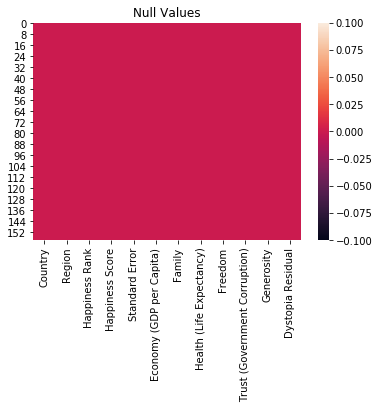

In [63]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

converting objects using encoder

In [64]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Country"]=LE.fit_transform(df["Country"])
df["Region"]=LE.fit_transform(df["Region"])

In [65]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


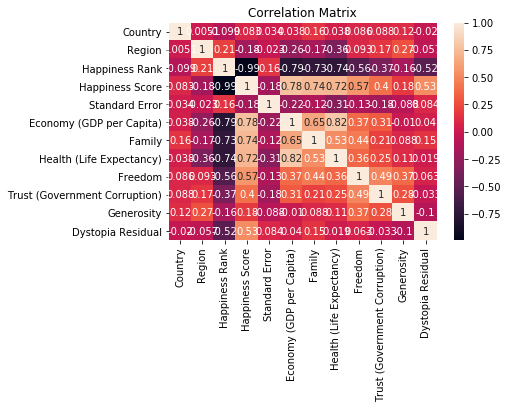

In [66]:
#checking Correaltion
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


In [67]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [68]:
corr_mat["Happiness Score"].sort_values(ascending=False) 
#identifying with target varible

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

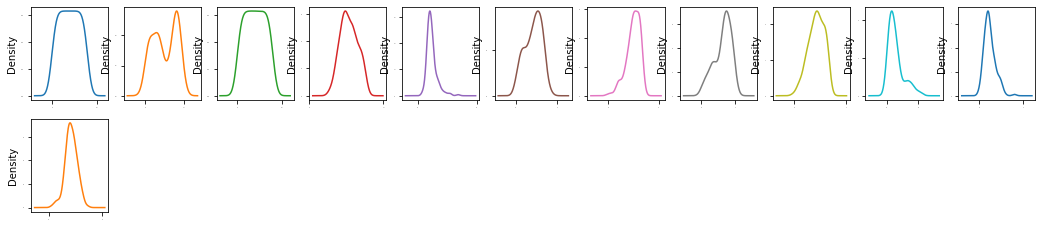

In [69]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [70]:
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]
#splitting individual and target variable in x and y

In [71]:
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

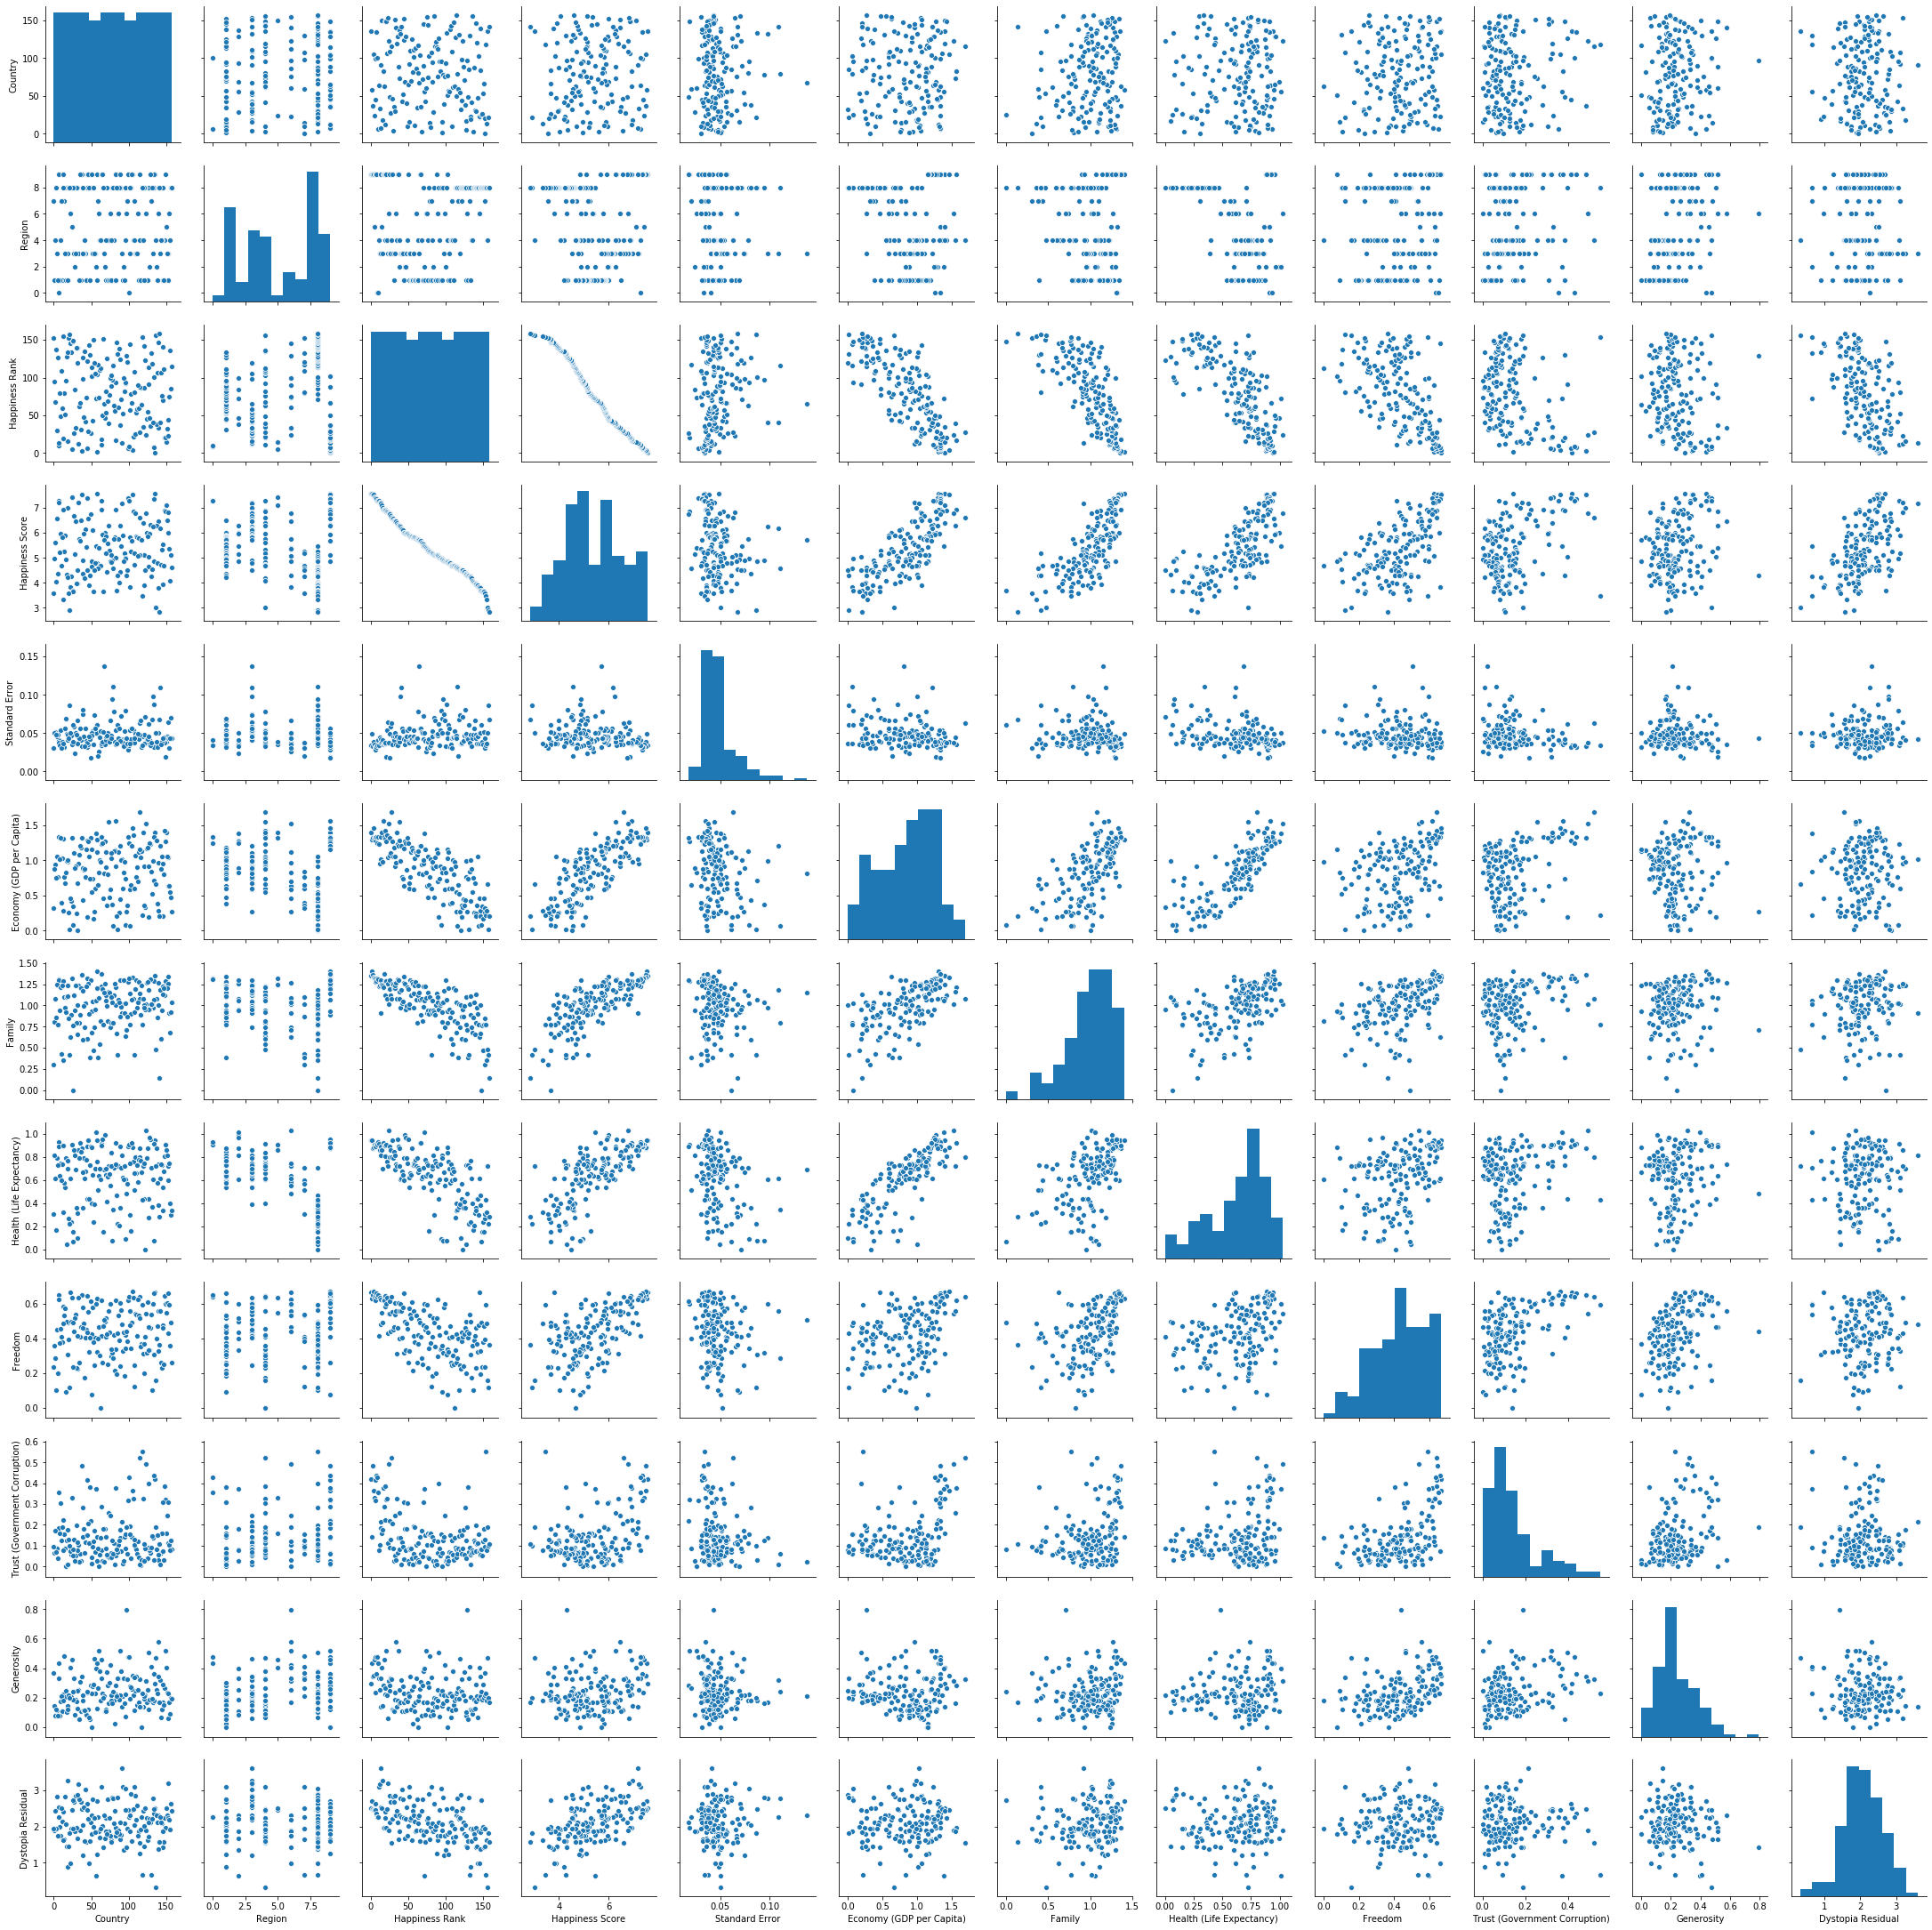

In [72]:
sns.pairplot(df)
plt.show()

we can see skewness in the dataset, we will remove skewness

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
df_new=scaler.transform(x)
df_new
df_new=pd.DataFrame(df_new,columns=x.columns)

In [74]:
df_new

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.859873,1.000000,0.000000,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.369427,1.000000,0.006369,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.235669,1.000000,0.012739,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.668790,1.000000,0.019108,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.152866,0.555556,0.025478,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
5,0.286624,1.000000,0.031847,0.109076,0.763272,0.940117,0.867213,0.958132,0.749615,0.293399,0.699841
6,0.630573,1.000000,0.038217,0.080287,0.786455,0.912953,0.870851,0.919415,0.576435,0.598206,0.652843
7,0.853503,1.000000,0.044586,0.110511,0.787798,0.919300,0.888437,0.985173,0.794405,0.455621,0.623972
8,0.636943,0.000000,0.050955,0.128577,0.739568,0.941122,0.885999,0.954683,0.777699,0.596836,0.591304
9,0.038217,0.000000,0.057325,0.188687,0.788905,0.933677,0.908617,0.972392,0.645703,0.547344,0.591979


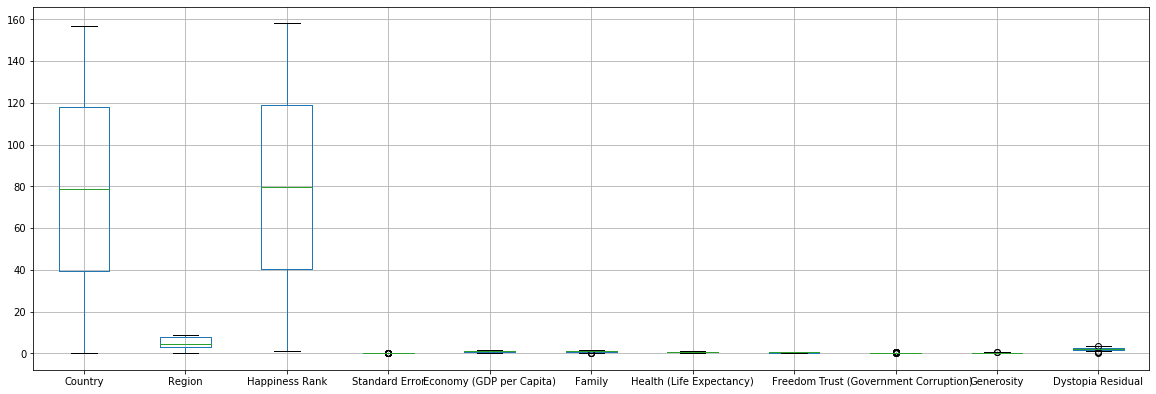

In [89]:
x.iloc[:,0:100].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [77]:
df_new

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.859873,1.000000,0.000000,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.369427,1.000000,0.006369,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.235669,1.000000,0.012739,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.668790,1.000000,0.019108,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.152866,0.555556,0.025478,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
5,0.286624,1.000000,0.031847,0.109076,0.763272,0.940117,0.867213,0.958132,0.749615,0.293399,0.699841
6,0.630573,1.000000,0.038217,0.080287,0.786455,0.912953,0.870851,0.919415,0.576435,0.598206,0.652843
7,0.853503,1.000000,0.044586,0.110511,0.787798,0.919300,0.888437,0.985173,0.794405,0.455621,0.623972
8,0.636943,0.000000,0.050955,0.128577,0.739568,0.941122,0.885999,0.954683,0.777699,0.596836,0.591304
9,0.038217,0.000000,0.057325,0.188687,0.788905,0.933677,0.908617,0.972392,0.645703,0.547344,0.591979


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.33, random_state=42)

In [79]:
X_train

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,0.732484,0.444444,0.171975,0.372225,1.000000,0.769203,0.777693,0.956206,0.945951,0.409270,0.375176
86,0.770701,0.111111,0.547771,0.254622,0.544557,0.720025,0.729929,0.300225,0.047417,0.241632,0.518219
127,0.108280,0.888889,0.808917,0.260532,0.587753,0.787774,0.046584,0.739029,0.226015,0.131439,0.346177
41,0.267516,0.333333,0.261146,0.318278,0.452278,0.731028,0.660688,0.602482,0.213368,0.134342,0.826751
4,0.152866,0.555556,0.025478,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
32,0.184713,0.333333,0.203822,0.270409,0.543421,0.884434,0.673758,0.798322,0.092769,0.231203,0.772489
60,0.547771,0.666667,0.382166,0.209540,0.665432,0.763234,0.706111,0.791722,0.190267,0.415578,0.475577
151,0.127389,0.888889,0.961783,0.209033,0.152696,0.607518,0.264570,0.589685,0.232502,0.273245,0.347133
66,0.222930,1.000000,0.420382,0.315070,0.714692,0.636971,0.900814,0.607290,0.111359,0.384958,0.476768
16,0.522293,1.000000,0.101911,0.139384,0.925161,0.869779,0.896308,0.919520,0.684858,0.352239,0.501298


In [80]:
y_train

27     6.611
86     5.123
127    4.332
41     6.130
4      7.427
32     6.477
60     5.770
151    3.587
66     5.689
16     6.946
124    4.419
10     7.278
108    4.694
104    4.788
0      7.587
114    4.610
64     5.709
44     5.995
82     5.192
28     6.575
40     6.168
144    3.819
25     6.750
23     6.798
111    4.677
39     6.269
85     5.124
101    4.857
153    3.465
132    4.252
47     5.975
115    4.571
61     5.759
73     5.399
33     6.455
105    4.786
112    4.642
119    4.517
62     5.754
94     4.959
97     4.885
53     5.855
5      7.406
110    4.681
118    4.518
49     5.948
35     6.329
80     5.194
77     5.268
34     6.411
46     5.984
7      7.364
43     6.003
70     5.477
147    3.678
91     5.013
83     5.140
142    3.896
143    3.845
89     5.073
8      7.286
113    4.633
13     7.187
59     5.791
135    4.077
3      7.522
17     6.940
38     6.295
72     5.429
138    3.989
6      7.378
131    4.271
100    4.867
2      7.527
120    4.514
63     5.716
54     5.848

In [81]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print(linreg.intercept_)
print(linreg.coef_)

0.32927886961213826
[-7.82135565e-05 -1.71252282e-04 -2.86356373e-04 -1.15552148e-04
  1.69054530e+00  1.40209044e+00  1.02499428e+00  6.69606825e-01
  5.51862226e-01  7.95893557e-01  3.27331174e+00]


In [83]:
list(zip(df_new.columns, linreg.coef_))

[('Country', -7.821355645041924e-05),
 ('Region', -0.00017125228186981722),
 ('Happiness Rank', -0.0002863563734265975),
 ('Standard Error', -0.00011555214767163669),
 ('Economy (GDP per Capita)', 1.690545302999733),
 ('Family', 1.4020904389364046),
 ('Health (Life Expectancy)', 1.024994282500122),
 ('Freedom', 0.6696068248097741),
 ('Trust (Government Corruption)', 0.5518622264499),
 ('Generosity', 0.7958935569502257),
 ('Dystopia Residual', 3.273311737906283)]

In [93]:
y_pred = linreg.predict(X_test)
from sklearn import metrics

# Mean Absolute Error (MAE)
print('Mean Absolute Error ',metrics.mean_absolute_error(y_test, y_pred))
print("test:")
print(linreg.score(X_test,y_test))
print("train:")
print(linreg.score(X_train, y_train))

Mean Absolute Error  0.0002442634994038593
test:
0.999999938156475
train:
0.9999999437535412


In [85]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, y_pred))

8.214481077038922e-08


In [86]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.000286609160304393


Text(0, 0.5, 'Predictions')

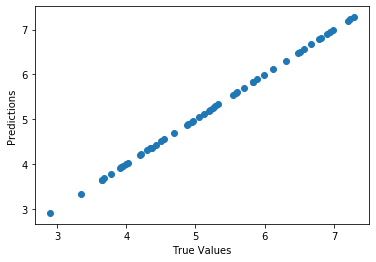

In [87]:
# plotting the model 

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [94]:
import joblib
joblib.dump(linreg,'World Happiness Report.obj') #save the model as object file

['World Happiness Report.obj']